In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scripts import bookdatafunctions as bdf
from pprint import pprint
from collections import Counter

In [2]:
#Constants
AGE_FOLDER = "Data/ages_csv/"
GROUPS_FOLDER = "Data/groups_csv/"
REGISTERS_FOLDER = "Data/registers_csv/"
WHOLE_FOLDER = "Data/whole_csv/"
SHEET_NAMES_AGES = ['5','6','7','8','9','10','11','12','13','14','15']
SHEET_NAMES_GROUPS = ['7-8','9-12','13+']
SHEET_NAMES_REGISTERS = ['Fiction', 'Nonfiction', 'Textbook']
WHOLE = ['Whole']
UPOS_TAGS = {'ADJ','ADP','ADV','AUX','CCONJ','INTJ','NOUN','NUM','PRON','PROPN','PUNCT','SCONJ','SYM','VERB'}

In [3]:
#Read CSV-files into dictionaries
dfs_ages = {}
for sheet in SHEET_NAMES_AGES:
     dfs_ages[sheet] = pd.read_csv(AGE_FOLDER+sheet+".csv", sep=';', keep_default_na=False)
dfs_groups = {}
for sheet in SHEET_NAMES_GROUPS:
     dfs_groups[sheet] = pd.read_csv(GROUPS_FOLDER+sheet+".csv", sep=';', keep_default_na=False)
dfs_registers = {}
for sheet in SHEET_NAMES_REGISTERS:
     dfs_registers[sheet] = pd.read_csv(REGISTERS_FOLDER+sheet+".csv", sep=';', keep_default_na=False)
dfs_whole = {}
dfs_whole['Whole'] = pd.read_csv(WHOLE_FOLDER+"Whole.csv", sep=';', keep_default_na=False)

In [4]:
#Column names of the CSV-files
print(list(dfs_ages.values())[0].columns)

Index(['text', 'lemma', 'upos', 'Word-POS F', 'Word F', 'Word CD', 'Word D',
       'Word U', 'Word SFI', 'Word Zipf', 'Lemma F', 'Lemma CD', 'Lemma D',
       'Lemma U', 'Lemma SFI', 'Lemma Zipf', 'Lemma IFS', 'Word Syllables',
       'Word Length', 'Lemma Length', 'Word FSA', 'Lemma FSA'],
      dtype='object')


# Raw frequencies

In [5]:
#Print out raw frequency statistics displayed in Tables 2, 3, and 4 of the original paper
def formatRawFrequencyTable(dfs, names):
    dfs = dfs.copy()
    returnable = {}
    word_amounts = {sheet:dfs[sheet].drop_duplicates(['text','upos'])['Word-POS F'].sum() for sheet in names}
    word_types = {sheet:len(dfs[sheet]['text'].drop_duplicates()) for sheet in names}
    hapax_words = {sheet:len(dfs[sheet][dfs[sheet]['Word F'] == 1].drop_duplicates('text')) for sheet in names}
    lemma_types = {sheet:len(dfs[sheet]['lemma'].drop_duplicates()) for sheet in names}
    hapax_lemmas = {sheet:len(dfs[sheet][dfs[sheet]['Lemma F'] == 1].drop_duplicates('lemma')) for sheet in names}
    for sheet in names:
        returnable[sheet] = str(sheet)+" & "+str(word_amounts[sheet])+" & "+str(word_types[sheet])+" & "+str(hapax_words[sheet])+" & "+str(lemma_types[sheet])+" \\\\"
    return returnable

In [6]:
temp = list(formatRawFrequencyTable(dfs_ages, SHEET_NAMES_AGES).values())
#temp.sort()
for i in temp:
    print(i)

5 & 264916 & 51952 & 34711 & 23681 \\
6 & 359346 & 58383 & 36787 & 23878 \\
7 & 805584 & 105378 & 65011 & 43058 \\
8 & 956309 & 110571 & 67364 & 44330 \\
9 & 1762152 & 166898 & 97972 & 63856 \\
10 & 502469 & 74615 & 46897 & 30301 \\
11 & 299504 & 53559 & 33346 & 22994 \\
12 & 1401351 & 146939 & 89046 & 56102 \\
13 & 935010 & 123067 & 76449 & 49531 \\
14 & 2542211 & 219694 & 130322 & 84321 \\
15 & 1764020 & 182655 & 110133 & 70608 \\


In [7]:
temp = list(formatRawFrequencyTable(dfs_groups, SHEET_NAMES_GROUPS).values())
#temp.sort()
for i in temp:
    print(i)

7-8 & 2386155 & 221813 & 133320 & 88806 \\
9-12 & 3965476 & 298336 & 172873 & 113552 \\
13+ & 5241241 & 368619 & 214874 & 141551 \\


In [8]:
temp = list(formatRawFrequencyTable(dfs_registers, SHEET_NAMES_REGISTERS).values())
#temp.sort()
for i in temp:
    print(i)

Fiction & 10142892 & 515515 & 293663 & 197006 \\
Nonfiction & 942971 & 159626 & 102762 & 68706 \\
Textbook & 507009 & 86565 & 52674 & 38694 \\


In [9]:
temp = list(formatRawFrequencyTable(dfs_whole, WHOLE).values())
#temp.sort()
for i in temp:
    print(i)

Whole & 11592872 & 622750 & 358420 & 245216 \\


# POS-tags

In [10]:
#Function for formatting text to get a POS proportion table as in the original paper
def formatPOSProportions(dfs, names):
    returnable = {}
    word_amounts = {sheet:dfs[sheet]['Word-POS F'].sum() for sheet in names}
    for tag in UPOS_TAGS:
        text = tag+" "
        for sheet in names:
            df = dfs[sheet]
            text += "& "+str(round(((df[df['upos'] == tag]['Word-POS F'].sum())/word_amounts[sheet])*100, ndigits=1))+" "
        returnable[tag] = text+"\\\\"
    return returnable

In [11]:
#For age groups
temp = list(formatPOSProportions(dfs_groups, SHEET_NAMES_GROUPS).values())
temp.sort()
for i in temp:
    print(i)

ADJ & 5.5 & 5.0 & 5.1 \\
ADP & 1.4 & 1.4 & 1.4 \\
ADV & 9.5 & 9.1 & 8.9 \\
AUX & 6.4 & 6.5 & 7.1 \\
CCONJ & 3.9 & 3.8 & 3.8 \\
INTJ & 0.4 & 0.3 & 0.3 \\
NOUN & 19.3 & 18.9 & 18.2 \\
NUM & 0.7 & 0.8 & 0.8 \\
PRON & 10.4 & 11.3 & 11.5 \\
PROPN & 4.9 & 4.2 & 4.2 \\
PUNCT & 19.2 & 19.3 & 19.6 \\
SCONJ & 2.3 & 2.5 & 2.6 \\
SYM & 0.0 & 0.6 & 0.4 \\
VERB & 15.9 & 16.2 & 15.8 \\


In [12]:
#For whole lexicon
temp = list(formatPOSProportions(dfs_whole, WHOLE).values())
temp.sort()
for i in temp:
    print(i)

ADJ & 5.1 \\
ADP & 1.4 \\
ADV & 9.3 \\
AUX & 6.6 \\
CCONJ & 3.8 \\
INTJ & 0.4 \\
NOUN & 18.5 \\
NUM & 0.9 \\
PRON & 11.8 \\
PROPN & 4.3 \\
PUNCT & 19.1 \\
SCONJ & 2.4 \\
SYM & 0.4 \\
VERB & 15.7 \\


# Other statistical data

In [ ]:
#Function for outputting text for any wanted statistic in TCBLex as displayed in the original paper
STATISTICAL_TABLE_ROWs = ['M', 'SD', 'Min', 'P10', 'P25', 'P50', 'P75', 'P90', 'Max']
def formatStatisticalDataTypeLevel(dfs, column: str, names, table_format: bool=True):
    temp = {}
    duplicate_row = 'text'
    if column.find('Lemma') != -1:
        duplicate_row = 'lemma'
    for sheet in names:
        stats = []
        data = dfs[sheet].drop_duplicates(duplicate_row)[column].to_numpy()
        stats.append(round(np.mean(data), ndigits=3))
        stats.append(np.std(data))
        stats.append(np.min(data))
        stats.append(np.percentile(data, 10))
        stats.append(np.percentile(data, 25))
        stats.append(np.percentile(data, 50))
        stats.append(np.percentile(data, 75))
        stats.append(np.percentile(data, 90))
        stats.append(np.max(data))
        temp[sheet] = stats
    returnable = {}
    for i in range(len(STATISTICAL_TABLE_ROWs)):
        stats = []
        for sheet in names:
            stats.append(temp[sheet][i])
        if table_format:
            stats = [str(round(x, ndigits=3)) for x in stats]
            returnable[STATISTICAL_TABLE_ROWs[i]] = (STATISTICAL_TABLE_ROWs[i]+" & "+" & ".join(stats) + " \\\\")
        else:
            return temp
        
    return returnable
#Same function but for getting data on a token level
#In practice, adds to calculations the wanted stat per column, but times it by the frequency
#This way, very frequent words like "ja" (Finnish for "and") get counted multiple times and pull down the average length of words
#Basically only meant to be used with "Length", but can be used for the other statistics as well (although not adviced and will generally yield nonsense)
def formatStatisticalDataTokenLevel(dfs, column: str, names, table_format: bool=True):
    temp = {}
    duplicate_row = 'text'
    freq_column = "Word F"
    if column.find('Lemma') != -1:
        duplicate_row = 'lemma'
        freq_column = "Lemma F"
    for sheet in names:
        stats = []
        df = dfs[sheet].drop_duplicates(duplicate_row)
        col_values = [[x] for x in df[column].to_numpy()]
        times = df[freq_column].to_numpy()
        token_level_amounts = [col_values[i]*times[i] for i in range(len(col_values))]
        data = np.concatenate(token_level_amounts)
        stats.append(round(np.mean(data), ndigits=3))
        stats.append(np.std(data))
        stats.append(np.min(data))
        stats.append(np.percentile(data, 10))
        stats.append(np.percentile(data, 25))
        stats.append(np.percentile(data, 50))
        stats.append(np.percentile(data, 75))
        stats.append(np.percentile(data, 90))
        stats.append(np.max(data))
        temp[sheet] = stats
    returnable = {}
    for i in range(len(STATISTICAL_TABLE_ROWs)):
        stats = []
        for sheet in names:
            stats.append(temp[sheet][i])
        if table_format:
            stats = [str(round(x, ndigits=3)) for x in stats]
            returnable[STATISTICAL_TABLE_ROWs[i]] = (STATISTICAL_TABLE_ROWs[i]+" & "+" & ".join(stats) + " \\\\")
        else:
            return temp
        
    return returnable

# Example for word/lemma length on both type and token level

In [46]:
#Type level
stat_pulled = "Length"

temp_word_group = list(formatStatisticalDataTypeLevel(dfs_groups, "Word "+stat_pulled, SHEET_NAMES_GROUPS).values())
temp_word_whole = list(formatStatisticalDataTypeLevel(dfs_whole, "Word "+stat_pulled, WHOLE).values())
temp_lemma_group = list(formatStatisticalDataTypeLevel(dfs_groups, "Lemma "+stat_pulled, SHEET_NAMES_GROUPS).values())
temp_lemma_whole = list(formatStatisticalDataTypeLevel(dfs_whole, "Lemma "+stat_pulled, WHOLE).values())

In [47]:
#Helper loop for outputting Latex-friendly data
for i in range(len(temp_word_group)):
    w_g = temp_word_group[i]
    w_w = temp_word_whole[i]
    l_g = temp_lemma_group[i]
    l_w = temp_lemma_whole[i]
    to_print = w_w[:-2]+w_g[w_g.find('&'):-2]+l_w[l_w.find('&'):-2]+l_g[l_w.find('&'):]
    print(to_print)

M & 10.956 & 10.124 & 10.412 & 10.688 & 10.548 & 9.825 & 10.049 & 10.319 \\
SD & 3.679 & 3.412 & 3.477 & 3.644 & 4.377 & 4.02 & 4.124 & 4.364 \\
Min & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
P10 & 7.0 & 6.0 & 6.0 & 6.0 & 5.0 & 5.0 & 5.0 & 5.0 \\
P25 & 8.0 & 8.0 & 8.0 & 8.0 & 7.0 & 7.0 & 7.0 & 7.0 \\
P50 & 11.0 & 10.0 & 10.0 & 10.0 & 10.0 & 10.0 & 10.0 & 10.0 \\
P75 & 13.0 & 12.0 & 12.0 & 13.0 & 13.0 & 12.0 & 13.0 & 13.0 \\
P90 & 16.0 & 14.0 & 15.0 & 15.0 & 16.0 & 15.0 & 15.0 & 16.0 \\
Max & 69 & 69 & 42 & 50 & 52 & 52 & 44 & 50 \\


In [48]:
#Token level
temp_word_group = list(formatStatisticalDataTokenLevel(dfs_groups, "Word "+stat_pulled, SHEET_NAMES_GROUPS).values())
temp_word_whole = list(formatStatisticalDataTokenLevel(dfs_whole, "Word "+stat_pulled, WHOLE).values())
temp_lemma_group = list(formatStatisticalDataTokenLevel(dfs_groups, "Lemma "+stat_pulled, SHEET_NAMES_GROUPS).values())
temp_lemma_whole = list(formatStatisticalDataTokenLevel(dfs_whole, "Lemma "+stat_pulled, WHOLE).values())

In [49]:
#Helper loop for outputting Latex-friendly data
for i in range(len(temp_word_group)):
    w_g = temp_word_group[i]
    w_w = temp_word_whole[i]
    l_g = temp_lemma_group[i]
    l_w = temp_lemma_whole[i]
    to_print = w_w[:-2]+w_g[w_g.find('&'):-2]+l_w[l_w.find('&'):-2]+l_g[l_w.find('&'):]
    print(to_print)

M & 5.309 & 5.318 & 5.314 & 5.301 & 4.707 & 4.728 & 4.712 & 4.693 \\
SD & 3.511 & 3.464 & 3.496 & 3.543 & 3.059 & 3.029 & 3.044 & 3.083 \\
Min & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
P10 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 \\
P25 & 2.0 & 2.0 & 2.0 & 2.0 & 2.0 & 2.0 & 2.0 & 2.0 \\
P50 & 5.0 & 5.0 & 5.0 & 5.0 & 4.0 & 5.0 & 4.0 & 4.0 \\
P75 & 7.0 & 7.0 & 8.0 & 7.0 & 6.0 & 6.0 & 6.0 & 6.0 \\
P90 & 10.0 & 10.0 & 10.0 & 10.0 & 9.0 & 9.0 & 9.0 & 9.0 \\
Max & 69 & 69 & 42 & 50 & 52 & 52 & 44 & 50 \\


Example for Inflection Family Size on type level

In [50]:
#Example for Inflextion Family Size statistics
stat = "Lemma IFS"
temp_word_group = list(formatStatisticalDataTypeLevel(dfs_groups, stat, SHEET_NAMES_GROUPS).values())
temp_word_whole = list(formatStatisticalDataTypeLevel(dfs_whole, stat, WHOLE).values())

In [51]:
#Helper loop for outputting Latex-friendly data
for i in range(len(temp_word_group)):
    w_g = temp_word_group[i]
    w_w = temp_word_whole[i]
    to_print = w_w[:-2]+w_g[w_g.find('&'):]
    print(to_print)

M & 2.539 & 2.46 & 2.597 & 2.607 \\
SD & 5.742 & 4.948 & 5.413 & 5.559 \\
Min & 1 & 1 & 1 & 1 \\
P10 & 1.0 & 1.0 & 1.0 & 1.0 \\
P25 & 1.0 & 1.0 & 1.0 & 1.0 \\
P50 & 1.0 & 1.0 & 1.0 & 1.0 \\
P75 & 2.0 & 2.0 & 2.0 & 2.0 \\
P90 & 5.0 & 5.0 & 5.0 & 5.0 \\
Max & 307 & 231 & 248 & 261 \\


# FSA plots

In [52]:
#Function for fetching FSA data from the wanted sublexicon
def getFSAInfo(dfs, lemmas: bool=False, token: bool=False):
    ages_per_sheet = {}
    for sheet in dfs:
        #If using lemmas
        if lemmas:
            sorted_df = dfs[sheet].sort_values('Lemma FSA').drop_duplicates('lemma')
            #If wanting to get token level data
            if token:
                ages = [[x] for x in sorted_df['Lemma FSA'].to_numpy()]
                times = sorted_df['Lemma F'].to_numpy()
                token_level_amounts = [ages[i]*times[i] for i in range(len(ages))]
                ages_per_sheet[sheet] = np.concatenate(token_level_amounts)
            #If wanting to get type level data
            else:
                ages_per_sheet[sheet] = (sorted_df['Lemma FSA'].to_numpy())
        #If using words
        else:
            sorted_df = dfs[sheet].sort_values('Word FSA').drop_duplicates(['text'])
            if token:
                ages = [[x] for x in sorted_df['Word FSA'].to_numpy()]
                times = sorted_df['Word F'].to_numpy()
                token_level_amounts = [ages[i]*times[i] for i in range(len(ages))]
                ages_per_sheet[sheet] = np.concatenate(token_level_amounts)
            else:
                ages_per_sheet[sheet] = (sorted_df['Word FSA'].to_numpy())
    counts = {x:Counter(ages_per_sheet[x]) for x in ages_per_sheet}
    print(counts)
    counts_scaled = {x:{y:round(counts[x][y]/len(ages_per_sheet[x]), ndigits=3) for y in counts[x]} for x in counts}
    print(counts_scaled)
    for s in counts_scaled:
        for a in range(5,16):
            counts_scaled[s].setdefault(a, 0.0)
    print(counts_scaled)
    return counts_scaled

PLOT_AGES = SHEET_NAMES_AGES
PLOT_COLORS = ['lime','royalblue','brown', 'grey','deeppink','lightskyblue','darkorange','indigo','tan','purple','cyan']
import matplotlib as mpl
PLOT_COLORS = list(mpl.color_sequences['petroff10'])
PLOT_COLORS.append(mpl.color_sequences['Paired'][-1])

{'5': Counter({5: 264916}), '6': Counter({5: 288408, 6: 70938}), '7': Counter({5: 638702, 7: 128340, 6: 38542}), '8': Counter({5: 763401, 8: 106734, 6: 45187, 7: 40987}), '9': Counter({5: 1381433, 9: 168875, 6: 98724, 7: 84259, 8: 28861}), '10': Counter({5: 379486, 10: 40944, 6: 33320, 7: 29088, 9: 10376, 8: 9255}), '11': Counter({5: 230507, 11: 23714, 6: 15684, 7: 13547, 8: 7540, 9: 7261, 10: 1251}), '12': Counter({5: 1123432, 12: 102446, 6: 64392, 7: 54924, 8: 23811, 9: 23582, 10: 5223, 11: 3541}), '13': Counter({5: 731100, 13: 67786, 6: 47122, 7: 36700, 9: 18979, 8: 18155, 12: 7343, 11: 3983, 10: 3842}), '14': Counter({5: 1994318, 14: 163459, 6: 132279, 7: 108963, 8: 46341, 9: 43413, 12: 20368, 13: 15581, 10: 9385, 11: 8104}), '15': Counter({5: 1380430, 15: 116458, 6: 83198, 7: 69192, 8: 31844, 9: 31171, 14: 17588, 12: 14324, 13: 9204, 10: 6423, 11: 4188})}
{'5': {5: 1.0}, '6': {5: 0.803, 6: 0.197}, '7': {5: 0.793, 6: 0.048, 7: 0.159}, '8': {5: 0.798, 6: 0.047, 7: 0.043, 8: 0.112}, 

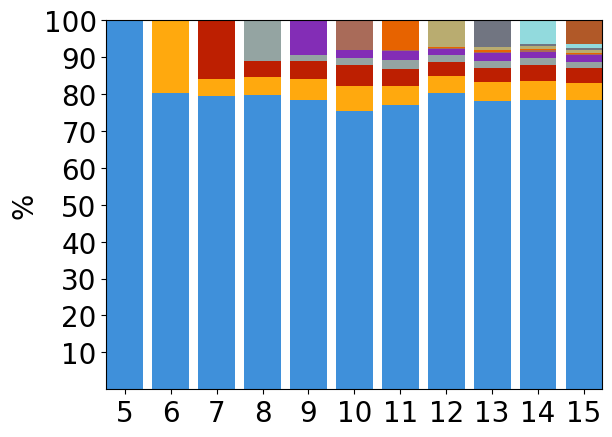

In [53]:
aoa_proportions_ages = getFSAInfo(dfs_ages, False, True)
test = [[aoa_proportions_ages[y][x] for x in range(5,16)] for y in aoa_proportions_ages]
#for t in test:
#    t.reverse()
y = np.column_stack(test)
x = range(5,16)


# Make new array consisting of fractions of column-totals,
# using .astype(float) to avoid integer division
percent = y * 100 
fig = plt.figure()
ax = fig.add_subplot(111)

totals = np.zeros(11)
for i in range(len(percent)):
    current = [y for y in percent[i]]
    ax.bar(x, current, bottom=totals, color=PLOT_COLORS[i])
    totals = np.add(totals, current)


#ax.stackplot(x, percent, labels=PLOT_AGES[::-1], colors=PLOT_COLORS)
#ax.set_title('Age of first appearance for word types within exact ages')
ax.set_ylabel('%', fontsize=20)
ax.margins(0, 0) # Set margins to avoid "whitespace"
ax.set_xticks(x)
ax.set_yticks(range(10,110,10))
ax.tick_params(axis='both', labelsize=20)
#ax.legend(PLOT_AGES[::-1])
plt.show()

{'7-8': Counter({5: 1955427, 7: 169327, 6: 154667, 8: 106734}), '9-12': Counter({5: 3114858, 6: 212120, 9: 210094, 7: 181818, 12: 102446, 8: 69467, 10: 47418, 11: 27255}), '13+': Counter({5: 4105848, 6: 262599, 7: 214855, 14: 181047, 15: 116458, 8: 96340, 9: 93563, 13: 92571, 12: 42035, 10: 19650, 11: 16275})}
{'7-8': {5: 0.819, 6: 0.065, 7: 0.071, 8: 0.045}, '9-12': {5: 0.785, 6: 0.053, 7: 0.046, 8: 0.018, 9: 0.053, 10: 0.012, 11: 0.007, 12: 0.026}, '13+': {5: 0.783, 6: 0.05, 7: 0.041, 8: 0.018, 9: 0.018, 10: 0.004, 11: 0.003, 12: 0.008, 13: 0.018, 14: 0.035, 15: 0.022}}
{'7-8': {5: 0.819, 6: 0.065, 7: 0.071, 8: 0.045, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0}, '9-12': {5: 0.785, 6: 0.053, 7: 0.046, 8: 0.018, 9: 0.053, 10: 0.012, 11: 0.007, 12: 0.026, 13: 0.0, 14: 0.0, 15: 0.0}, '13+': {5: 0.783, 6: 0.05, 7: 0.041, 8: 0.018, 9: 0.018, 10: 0.004, 11: 0.003, 12: 0.008, 13: 0.018, 14: 0.035, 15: 0.022}}


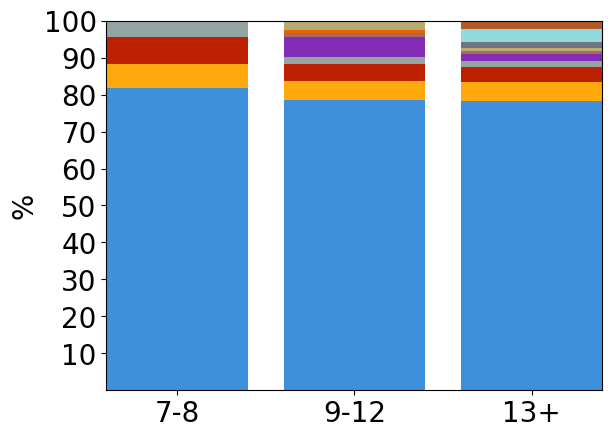

In [54]:
aoa_proportions_groups = getFSAInfo(dfs_groups, False, True)
test = [[aoa_proportions_groups[y][x] for x in range(5,16)] for y in aoa_proportions_groups]
#for t in test:
#    t.reverse()

y = np.column_stack(test)
x = range(0,3)

# Make new array consisting of fractions of column-totals,
# using .astype(float) to avoid integer division
percent = y /  y.sum(axis=0).astype(float) * 100 
fig = plt.figure()
ax = fig.add_subplot(111)
totals = np.zeros(len(x))
for i in range(len(percent)):
    current = [percent[i][y] for y in range(len(x))]
    ax.bar(x, current, bottom=totals, color=PLOT_COLORS[i])
    totals = np.add(totals, current)


#ax.set_title('Age of first appearance for word types within age groups')
ax.set_ylabel('%', fontsize=20)
ax.margins(0, 0) # Set margins to avoid "whitespace"
ax.set_xticks(x, labels=SHEET_NAMES_GROUPS)
ax.set_yticks(range(10,110,10))
ax.tick_params(axis='both', labelsize=20)
plt.show()

{'Whole': Counter({5: 9176133, 6: 629386, 7: 566000, 9: 303657, 8: 272541, 14: 181047, 12: 144481, 15: 116458, 13: 92571, 10: 67068, 11: 43530})}
{'Whole': {5: 0.792, 6: 0.054, 7: 0.049, 8: 0.024, 9: 0.026, 10: 0.006, 11: 0.004, 12: 0.012, 13: 0.008, 14: 0.016, 15: 0.01}}
{'Whole': {5: 0.792, 6: 0.054, 7: 0.049, 8: 0.024, 9: 0.026, 10: 0.006, 11: 0.004, 12: 0.012, 13: 0.008, 14: 0.016, 15: 0.01}}


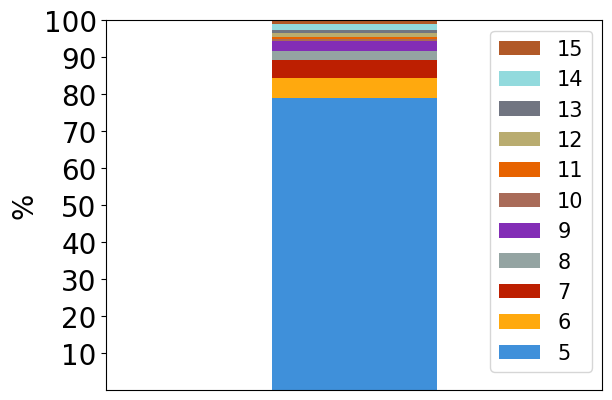

In [55]:
aoa_proportions_whole = getFSAInfo(dfs_whole, False, True)
test = [[aoa_proportions_whole[y][x] for x in range(5,16)] for y in aoa_proportions_whole]

y = np.column_stack(test)
x = range(0,1)

# Make new array consisting of fractions of column-totals,
# using .astype(float) to avoid integer division
percent = y /  y.sum(axis=0).astype(float) * 100 

fig = plt.figure()
ax = fig.add_subplot(111)

totals = np.zeros(len(x))
for i in range(len(percent)):
    current = [percent[i][0]]
    ax.bar(x, current, bottom=totals, color=PLOT_COLORS[i], width=0.5)
    totals = np.add(totals, current)

#ax.set_title('Age of first appearance for word types in TCBLex 1.0')
ax.set_ylabel('%', fontsize=20)
ax.margins(1, 0) # Set margins to avoid "whitespace"
ax.set_yticks(range(10,110,10))
ax.tick_params(axis='both', labelsize=20)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.legend(reverse=True, labels=PLOT_AGES, loc='upper right', fontsize=15)
plt.show()

# Zipf-values plot

In [56]:
import math
def plot_zipf(data: dict[str,pd.Series], column: str, dupe_col: str):
    fig, axs = plt.subplots(1,len(data))
    keys = list(data.keys())
    y_range = [np.inf,-np.inf]
    x_range = [np.inf,-np.inf]
    
    for i in range(len(keys)):
        x = i
        to_plot = data[keys[i]].drop_duplicates(dupe_col)[column]
        bins = np.linspace(np.min(to_plot), np.max(to_plot), 24) - 0.5
        axs[x].hist(to_plot.to_numpy(), bins=bins, color='#1A85FF')
        #axs[y, x].set_xticks(np.linspace(np.min(to_plot), np.max(to_plot) , 5) - 0.5)
        axs[x].set_title(keys[i], fontsize=20)
        per_50 = np.percentile(to_plot, 50)
        per_75 = np.percentile(to_plot, 75)
        per_90 = np.percentile(to_plot, 90)
        axs[x].axvline(per_50, color='#D41159', linestyle='dashed', linewidth=2, label='50th Percentile')
        #axs[x].axvline(per_75, color='#D41159', linestyle='dashed', linewidth=2, label='75th Percentile')
        axs[x].axvline(per_90, color='#D41159', linestyle='dashed', linewidth=2, label='90th Percentile')
    for ax in axs.flat:
        x_lim = ax.get_xlim()
        y_lim = ax.get_ylim()
        if x_lim[0] < x_range[0]:
            x_range[0] = x_lim[0]
        if x_lim[1] > x_range[1]:
            x_range[1] = x_lim[1]
        if y_lim[0] < y_range[0]:
            y_range[0] = y_lim[0]
        if y_lim[1] > y_range[1]:
            y_range[1] = y_lim[1]
        ax.set_ylim(0,)
        ax.label_outer()

    for ax in axs.flat:
        ax.set_ylim(y_range)
        ax.set_xlim(x_range)
        ax.set_xlim(2,5)
        space = np.linspace(3, 5, 5)
        ax.set_xticks(space - 0.5)
        y_space = np.linspace(50000, 450000, 9, dtype=int)
        ax.set_yticks(y_space)
        ax.tick_params(axis='both', labelsize=20)
        ax.label_outer()
        

    return fig, axs

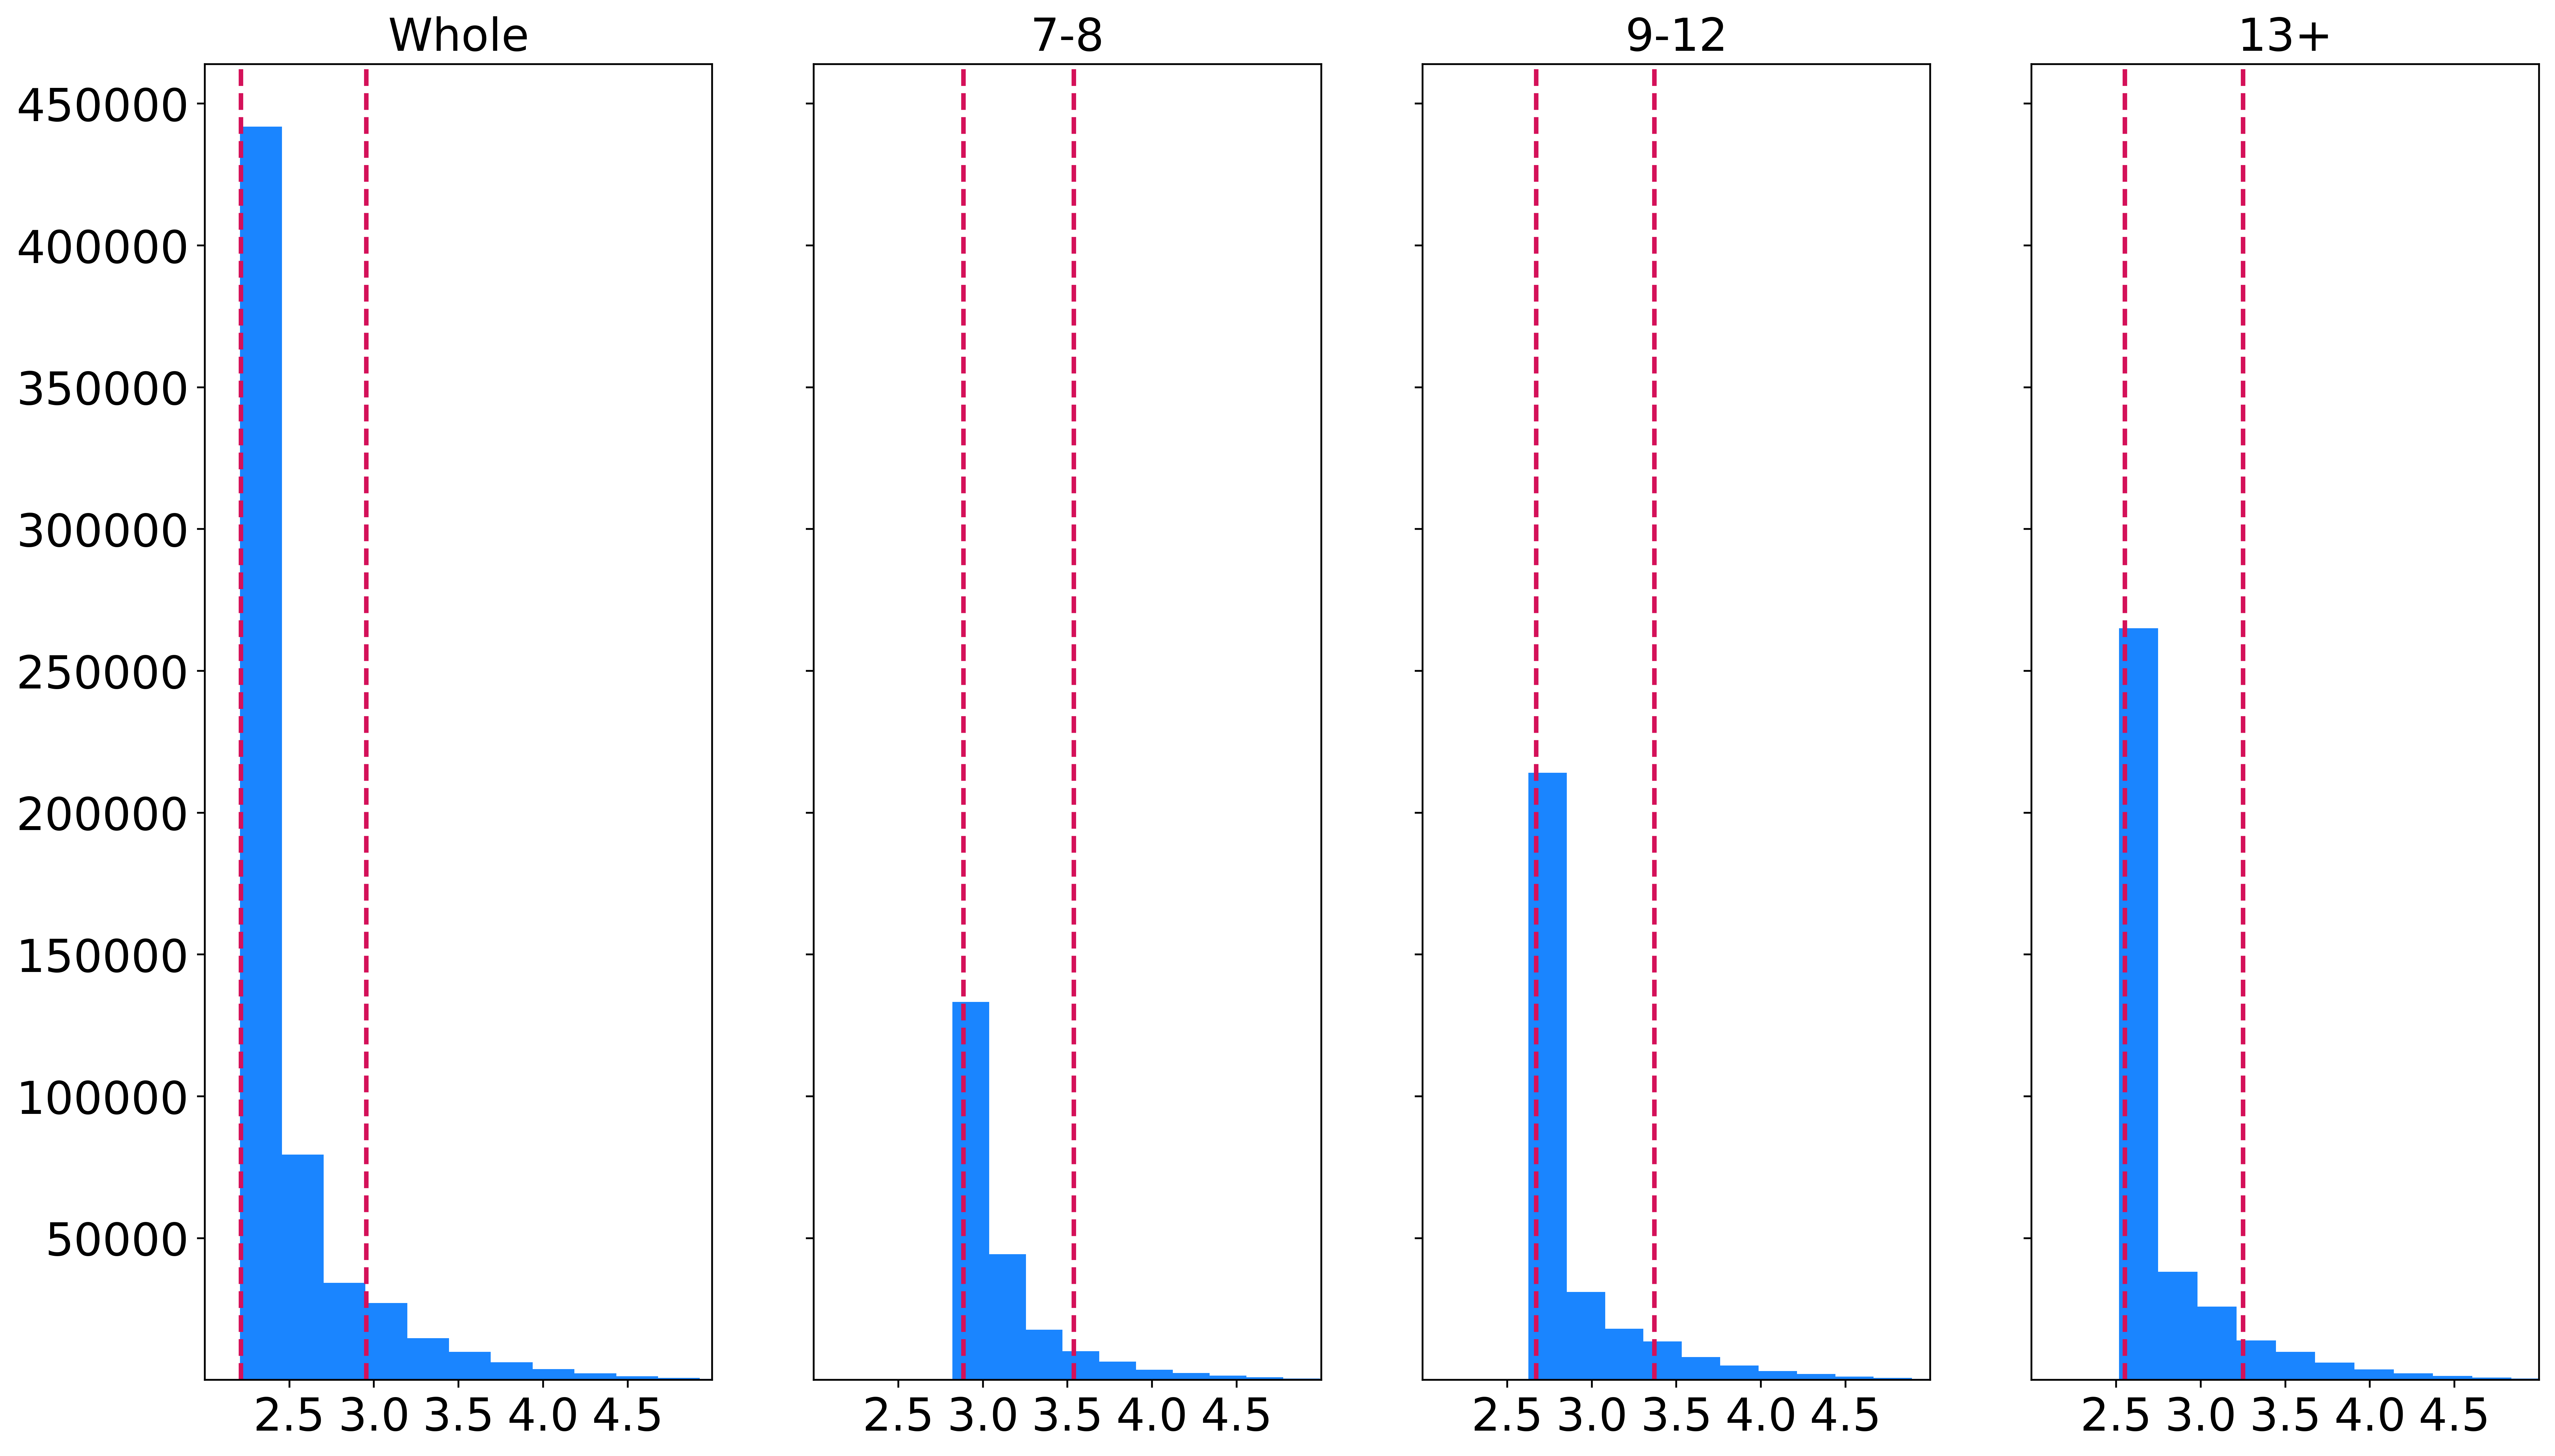

In [57]:
grpwh = bdf.combineSubCorpDicts([dfs_whole, dfs_groups])
fig, axs = plot_zipf(grpwh, 'Word Zipf', 'text')
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(500)

# Inflectional family size plot

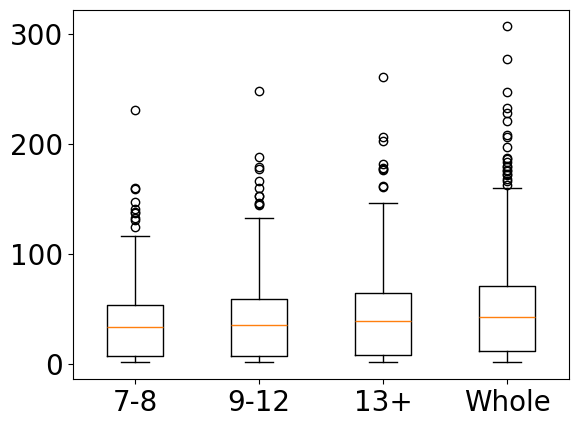

In [58]:
grpwh = bdf.combineSubCorpDicts([dfs_groups, dfs_whole])

datt = [grpwh[sheet][(grpwh[sheet]['Lemma F'] > np.percentile(grpwh[sheet]['Lemma F'], 90))].drop_duplicates('lemma')['Lemma IFS'].to_numpy() for sheet in grpwh]
plt.boxplot(datt)
plt.xticks([1,2,3,4], labels=list(grpwh.keys()))
plt.tick_params(axis='both', labelsize=20)

# Examples of how to query TCBLex using Pandas

In [59]:
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Word SFI'] > 75].drop_duplicates(['text'])))

18


In [60]:
#In how many books
print(len(dfs_whole['Whole'].drop_duplicates('lemma')['lemma']))
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Lemma CD'] < 0.005].drop_duplicates('lemma')))
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Lemma CD'] > 0.499].drop_duplicates('lemma')))
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Lemma CD'] > 0.499].drop_duplicates('lemma')) / len(dfs_whole['Whole'].drop_duplicates('lemma')['lemma']))
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Lemma CD'] == 1].drop_duplicates('lemma')))
print(dfs_whole['Whole'][dfs_whole['Whole']['Lemma CD'] == 1].drop_duplicates('lemma')['Lemma F'].sum()/dfs_whole['Whole'].drop_duplicates('lemma')['Lemma F'].sum())

245216
161270
1645
0.006708371395015007
27
0.3375632888899317


In [61]:
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Word CD'] < 0.005].drop_duplicates('text')))
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Word CD'] > 0.499].drop_duplicates('text')))
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Word CD'] == 1].drop_duplicates('text')))
print(dfs_whole['Whole'][dfs_whole['Whole']['Word CD'] == 1].drop_duplicates('text')['Word F'].sum()/dfs_whole['Whole'].drop_duplicates('text')['Word F'].sum())

395975
1947
15
0.23064457194041305
